In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [2]:
df = pd.read_csv("data_cleaned_2021.csv")

In [3]:
df.head()

for column in df.columns:
    print(column,": ",df[column][0])

index :  0
Job Title :  Data Scientist
Salary Estimate :  $53K-$91K (Glassdoor est.)
Job Description :  Data Scientist
Location: Albuquerque, NM
Education Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.
Skills Required:
Bachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D
Applicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude
Excellent verbal and written communication skills, and quantitative analytical skills are required
Applicant must be able to work in a team environment
U.S. citizenship and ability to obtain a DoD Secret Clearance required
Responsibilities: The applicant will be responsible for formulatin

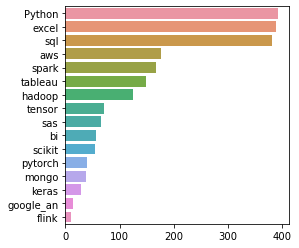

In [4]:
skills = df.loc[:, 'Python':'google_an']
_=plt.figure(figsize=(4,4))
_=sns.barplot(x=skills.sum().sort_values(ascending=False).values,y=skills.sum().sort_values(ascending=False).index)

In [5]:
numer = df.select_dtypes(include=np.number)
numer.columns

Index(['index', 'Rating', 'Founded', 'Hourly', 'Employer provided',
       'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an'],
      dtype='object')

In [6]:
numer =numer.drop(['index','Hourly',"Employer provided","Lower Salary","Upper Salary"],axis=1)
numer

,Rating,Founded,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,3.8,1973,72.0,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,3.4,1984,87.5,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.8,2010,85.0,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,3.8,1965,76.5,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.9,1998,114.5,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,1830,84.5,191,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
738,4.4,2006,102.5,15,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
739,2.6,1984,73.5,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
740,3.2,-1,127.5,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
category = df.select_dtypes(include = object)

In [8]:
category = category.drop(["Job Title", "Salary Estimate","Job Description", "Company Name", "Location", "Headquarters", "Industry", "Competitors", "company_txt"],axis=1)

In [9]:
category

,Size,Type of ownership,Sector,Revenue,Job Location,job_title_sim,seniority_by_title,Degree
0,501 - 1000,Company - Private,Aerospace & Defense,$50 to $100 million (USD),NM,data scientist,na,M
1,10000+,Other Organization,Health Care,$2 to $5 billion (USD),MD,data scientist,na,M
2,501 - 1000,Company - Private,Business Services,$100 to $500 million (USD),FL,data scientist,na,M
3,1001 - 5000,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),WA,data scientist,na,na
4,51 - 200,Company - Private,Business Services,Unknown / Non-Applicable,NY,data scientist,na,na
...,...,...,...,...,...,...,...,...
737,10000+,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),MA,other scientist,sr,M
738,1001 - 5000,Company - Public,Information Technology,$100 to $500 million (USD),TN,data engineer,sr,na
739,501 - 1000,College / University,Education,Unknown / Non-Applicable,PA,other scientist,na,P
740,1 - 50,Company - Private,Business Services,$5 to $10 million (USD),PA,data scientist,na,na


In [10]:
encoded = pd.get_dummies(category, drop_first=True)

In [11]:
encoded.head()

,Size_10000+,Size_1001 - 5000,Size_201 - 500,Size_5001 - 10000,Size_501 - 1000,Size_51 - 200,Size_unknown,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,...,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,seniority_by_title_na,seniority_by_title_sr,Degree_P,Degree_na
0,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
4,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [12]:
dummyDF = pd.concat([numer,encoded],axis=1)

In [13]:
dummyDF = sm.add_constant(dummyDF)
X = dummyDF.drop('Avg Salary(K)',axis = 1)
y = dummyDF[['Avg Salary(K)']]

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# initialize x and y testing and training variables
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [15]:
# build the linear regression model using fit()
LinRegFull = sm.OLS(ytrain, Xtrain).fit()
print(LinRegFull.summary())

                            OLS Regression Results                            
Dep. Variable:          Avg Salary(K)   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     7.921
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           7.74e-61
Time:                        18:25:43   Log-Likelihood:                -2667.8
No. Observations:                 593   AIC:                             5574.
Df Residuals:                     474   BIC:                             6095.
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [16]:
LinRegFullPredictions = LinRegFull.predict(Xtest)
LinRegFullPredictions

273    151.511171
414     55.061515
529    121.706482
502     94.557161
729     84.392200
          ...    
247    104.704316
341    101.680787
298    138.691022
132     91.797023
656    128.950912
Length: 149, dtype: float64

In [17]:
actualSalary = ytest["Avg Salary(K)"]
actualSalary

273     90.0
414     62.5
529    125.0
502     97.5
729     70.0
       ...  
247     50.0
341    111.5
298    162.5
132     81.5
656    114.0
Name: Avg Salary(K), Length: 149, dtype: float64

In [18]:
# linear regression comparing actual salaries to modeled salary predictions 
LinRegFullRMSE = rmse(actualSalary,LinRegFullPredictions)

# calculate R-squared
LinRegFullRSquared = LinRegFull.rsquared

# calculate Adjusted R-Squared
LinRegFullRSquaredAdj = LinRegFull.rsquared_adj

In [19]:
results = pd.DataFrame(columns = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared'] )
fullMetrics = pd.Series({'Model': "Linreg full model ",'RMSE':LinRegFullRMSE,'R-Squared': LinRegFullRSquared,'Adj. R-Squared': LinRegFullRSquaredAdj})

# append to the results table
results = results.append(fullMetrics, ignore_index = True)
results

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.384321,0.6635,0.57973


In [20]:
decisionTree = DecisionTreeRegressor(criterion = 'mse', random_state = 10) #Max depth D.Tree gets formed

# fit the model using trained data
decisionTreeModel = decisionTree.fit(Xtrain, ytrain)
yPred_DT=decisionTreeModel.predict(Xtest)
yPred_DT

array([120.5       ,  62.5       , 120.        ,  97.5       ,
        70.        , 109.        ,  65.5       , 107.        ,
        72.5       ,  81.        ,  71.75      ,  87.        ,
        41.5       , 123.5       , 164.5       ,  73.        ,
        93.33333333,  56.5       ,  84.5       ,  93.5       ,
       127.5       ,  72.5       , 122.        ,  85.        ,
        73.5       ,  87.5       , 109.        , 120.        ,
        80.        , 194.        , 114.5       ,  54.        ,
       153.5       ,  87.        , 139.5       , 120.        ,
        43.        ,  69.5       , 107.5       , 127.        ,
        75.5       ,  49.        ,  68.5       , 109.        ,
        60.        ,  84.        ,  56.5       , 111.        ,
        95.5       ,  50.        ,  61.        , 127.        ,
        90.66666667, 113.5       , 111.5       , 120.        ,
        50.        , 164.        , 124.        , 177.        ,
       110.5       ,  95.        ,  61.        ,  48.5 

In [21]:
ytest

,Avg Salary(K)
273,90.0
414,62.5
529,125.0
502,97.5
729,70.0
...,...
247,50.0
341,111.5
298,162.5
132,81.5


In [22]:
RSquareDT=decisionTreeModel.score(Xtest,ytest)
n = 593 
p = 119
# Compute Adjusted R-Squared
adjustRSquareDT = 1 - (1-RSquareDT)*(n-1)/(n-p-1)
adjustRSquareDT

0.49374517028337905

In [23]:
rmse_DT = (mean_squared_error(ytest, yPred_DT)) ** (1/2)

In [24]:
fullMetrics = pd.Series({'Model': "Decision Tree Model ",'RMSE':rmse_DT,'R-Squared': RSquareDT,'Adj. R-Squared': adjustRSquareDT})
# append the results to our results table
results = results.append(fullMetrics, ignore_index = True)
results

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.384321,0.663500,0.579730
1,Decision Tree Model,23.699238,0.595509,0.493745


In [25]:
rf = RandomForestRegressor(n_estimators=100, random_state=10)
# fit random forest model to trained data
rf.fit(Xtrain, ytrain)

/var/folders/vm/39l8g9l10r5cmk_8kpg_b4sm0000gn/T/ipykernel_6822/2392765213.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(Xtrain, ytrain)


RandomForestRegressor(random_state=10)

In [26]:
yPred_RF = rf.predict(Xtest)
yPred_RF

array([126.405     ,  63.355     , 100.23      ,  95.275     ,
        70.365     , 101.57      ,  77.86      ,  90.71      ,
        74.59      ,  79.82      ,  76.91694048,  87.57      ,
        89.445     , 102.72      , 152.065     ,  78.26      ,
        94.23358333,  56.455     ,  85.27      ,  92.885     ,
       115.6725    ,  54.32      , 122.87      , 101.9425    ,
        78.985     , 111.2       , 105.795     , 106.925     ,
        85.95125   , 171.53      , 112.505     ,  57.03      ,
       139.215     ,  77.105     , 133.70125   , 110.615     ,
        52.25      ,  62.13      , 107.22125   , 150.19      ,
        86.705     ,  57.155     ,  87.87      , 108.04      ,
        83.93060714,  89.22      ,  56.455     , 107.445     ,
        83.935     ,  54.99      ,  60.405     , 150.19      ,
        89.14504361, 107.62      , 103.01      , 100.23      ,
        56.455     , 150.31422222, 119.905     ,  98.35      ,
       113.469     ,  95.05      ,  59.73      ,  49.73

In [27]:
# Calculating MAE
rfMAE = mean_absolute_error(ytest, yPred_RF)
print('Mean Absolute Error (MAE):', rfMAE)

# Calculating MSE
rfMSE = mean_squared_error(ytest, yPred_RF)
print('Mean Squared Error (MSE):', rfMSE)

# Calculating RMSE
rfRMSE = np.sqrt(mean_squared_error(ytest, yPred_RF))
print('Root Mean Squared Error (RMSE):', rfRMSE)

Mean Absolute Error (MAE): 13.193035102015804
Mean Squared Error (MSE): 334.56361466909664
Root Mean Squared Error (RMSE): 18.291080194157388


In [28]:
randForestRSquared=rf.score(Xtest,ytest)
n = 593 
p = 119

# Compute Adjusted RSquared
randForestAdjustRSquared = 1 - (1-randForestRSquared)*(n-1)/(n-p-1)
# Compute RMSE
rmse_RF = (mean_squared_error(ytest, yPred_RF)) ** (1/2)

In [29]:
fullMetrics = pd.Series({'Model': "Random Forest ",'RMSE':rfRMSE,'R-Squared': randForestRSquared,'Adj. R-Squared': randForestAdjustRSquared})
results = results.append(fullMetrics, ignore_index = True)
results

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,28.384321,0.663500,0.579730
1,Decision Tree Model,23.699238,0.595509,0.493745
2,Random Forest,18.291080,0.759055,0.698436


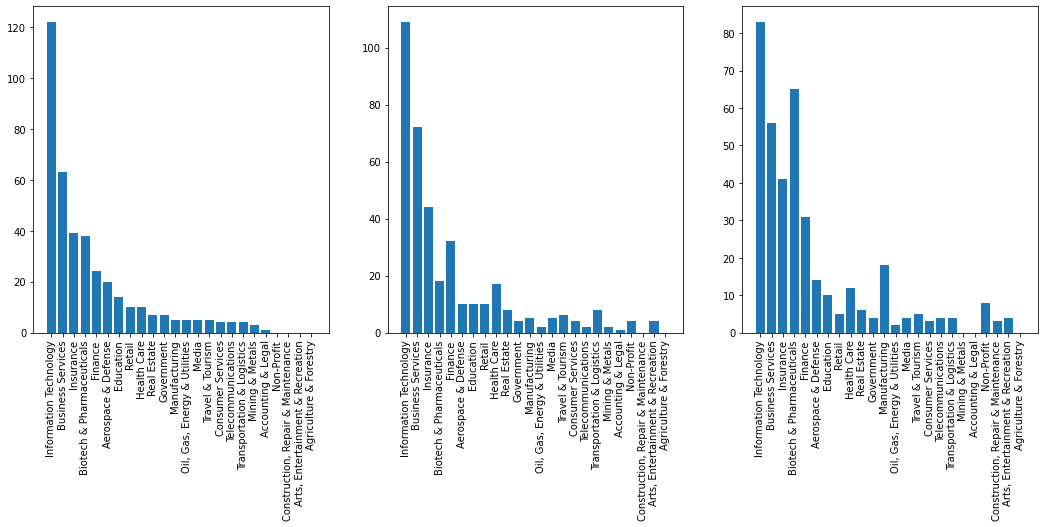

In [30]:
dfSector = df.copy()
dfSector = dfSector[dfSector['Sector'] != '-1']
dfSector = dfSector.groupby('Sector').sum().sort_values(by='Python', ascending=False)
dfSector.head()
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 6))

ax0.bar(dfSector.index, dfSector.Python)
ax0.tick_params(axis='x', labelrotation=90)

ax1.bar(dfSector.index, dfSector.sql)
ax1.tick_params(axis='x', labelrotation=90)

ax2.bar(dfSector.index, dfSector.excel)
ax2.tick_params(axis='x', labelrotation=90)

plt.show()